# 🚗 Car Sales Price Prediction  
Google Colab notebook that trains several regression models on **car sales.csv** and saves the best one.
1. Upload `car sales.csv` (Files → Upload).  
2. Run all cells top-to-bottom.  
3. Download `car_price_model.joblib` when finished.


In [1]:
# Uncomment if you need the latest versions

!pip install --upgrade -q scikit-learn pandas joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 23.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
!pip install pandas==2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 79.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


Imports & data load

In [3]:
import pandas as pd
from pathlib import Path

DATA_PATH = Path("/content/car sales.csv")      # adjust if file is elsewhere
if not DATA_PATH.exists():
    raise FileNotFoundError("Upload 'car sales.csv' first!")

df = pd.read_csv(DATA_PATH)
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,01-02-2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01-02-2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01-02-2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01-02-2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01-02-2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Cleaning & feature lists

In [4]:
df.columns = df.columns.str.strip()    # remove stray spaces

DROP_COLS = ["Car_id", "Date", "Customer Name",
             "Dealer_Name", "Dealer_No", "Phone"]
df = df.drop(columns=DROP_COLS)

TARGET = "Price ($)"
y = df[TARGET]
X = df.drop(columns=[TARGET])

cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

print("Categorical:", cat_cols)
print("Numeric    :", num_cols)


Categorical: ['Gender', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']
Numeric    : ['Annual Income']


Train Model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Choose one:
model = RandomForestRegressor(n_estimators=200, random_state=42)
# model = LinearRegression()


Fiting PipeLine

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

# Pick encoder: OneHot for LinearRegression, Ordinal for tree models
encoder = OneHotEncoder(handle_unknown='ignore') if isinstance(model, LinearRegression) else \
          OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor = ColumnTransformer([
    ("cat", encoder, cat_cols),
    ("num", "passthrough", num_cols)
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", model)
])

pipeline.fit(X, y)
print("✅ Model trained")


✅ Model trained


Saving model

In [10]:
import joblib

joblib.dump(pipeline, "car_price_model.joblib")
print("✅ Model saved as 'car_price_model.joblib'")


✅ Model saved as 'car_price_model.joblib'


Model

In [12]:
def predict_price(row_dict):
    """row_dict = {'Gender':'Male', 'Annual Income':85000, ...}"""
    import pandas as pd
    row_df = pd.DataFrame([row_dict])
    return pipeline.predict(row_df)[0]

# Example usage:
# sample = {'Gender':'Male','Annual Income':90000,'Company':'Ford',
#           'Model':'Focus','Engine':'Overhead Camshaft',
#           'Transmission':'Auto','Color':'Blue',
#           'Body Style':'Hatchback','Dealer_Region':'Seattle'}
# predict_price(sample)


Visualization Code – Best Car Sales Insights

<ipython-input-13-296add3180fd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="crest")
<ipython-input-13-296add3180fd>:16: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


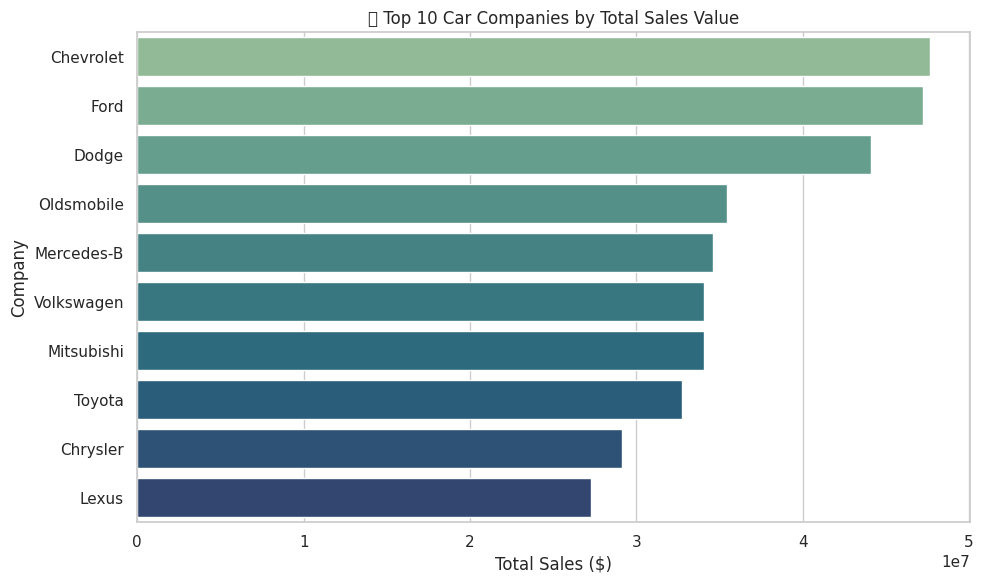

<ipython-input-13-296add3180fd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette="viridis")
<ipython-input-13-296add3180fd>:27: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


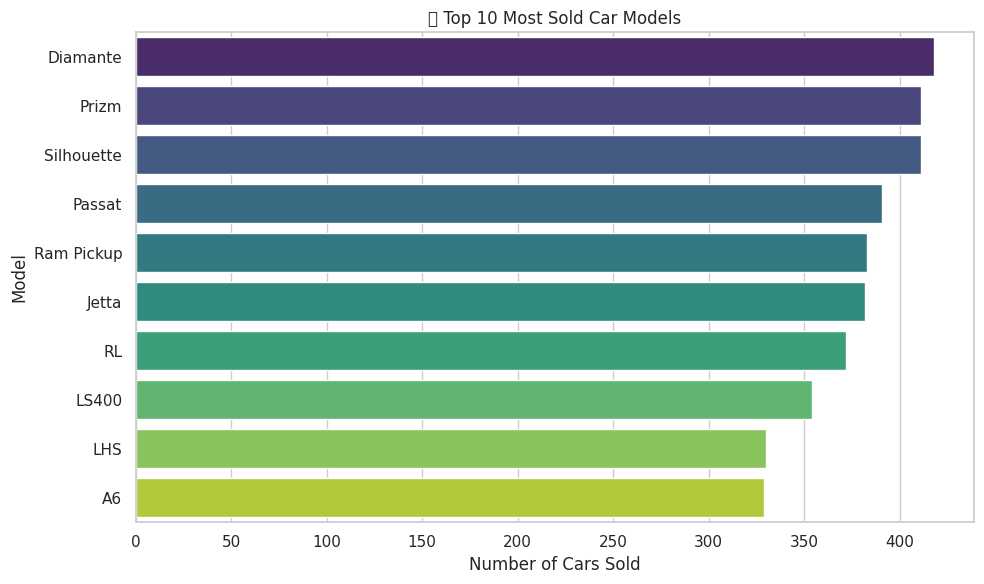

<ipython-input-13-296add3180fd>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Body Style", order=df["Body Style"].value_counts().index, palette="Set2")
<ipython-input-13-296add3180fd>:36: UserWarning: Glyph 128665 (\N{RECREATIONAL VEHICLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128665 (\N{RECREATIONAL VEHICLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


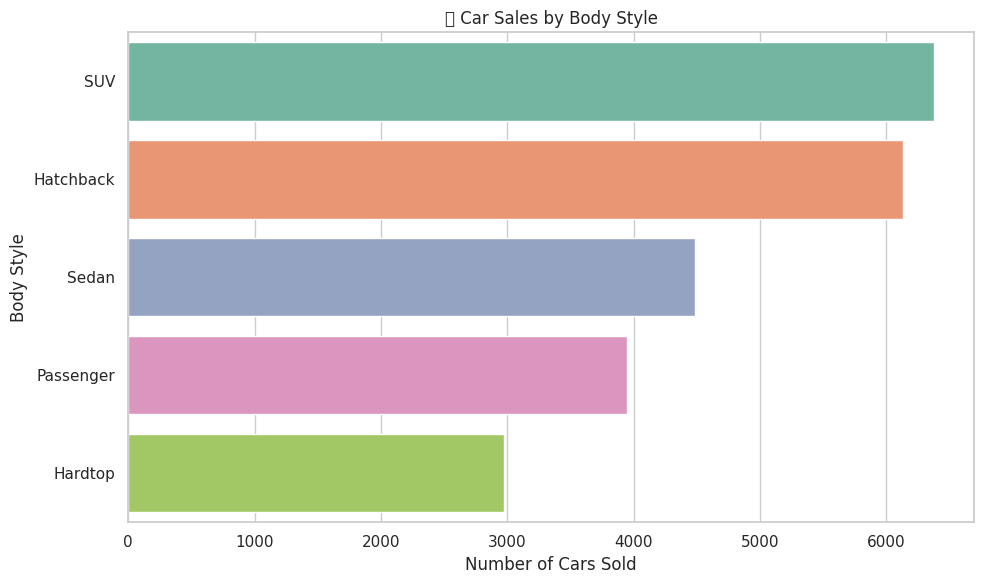

<ipython-input-13-296add3180fd>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Dealer_Region", order=df["Dealer_Region"].value_counts().index, palette="coolwarm")
<ipython-input-13-296add3180fd>:45: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


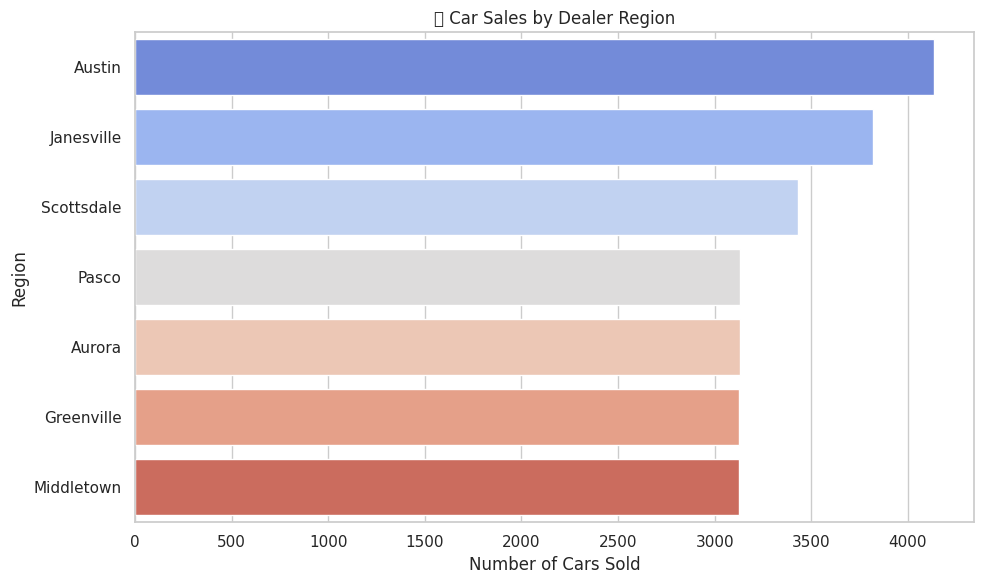

<ipython-input-13-296add3180fd>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="Set1")


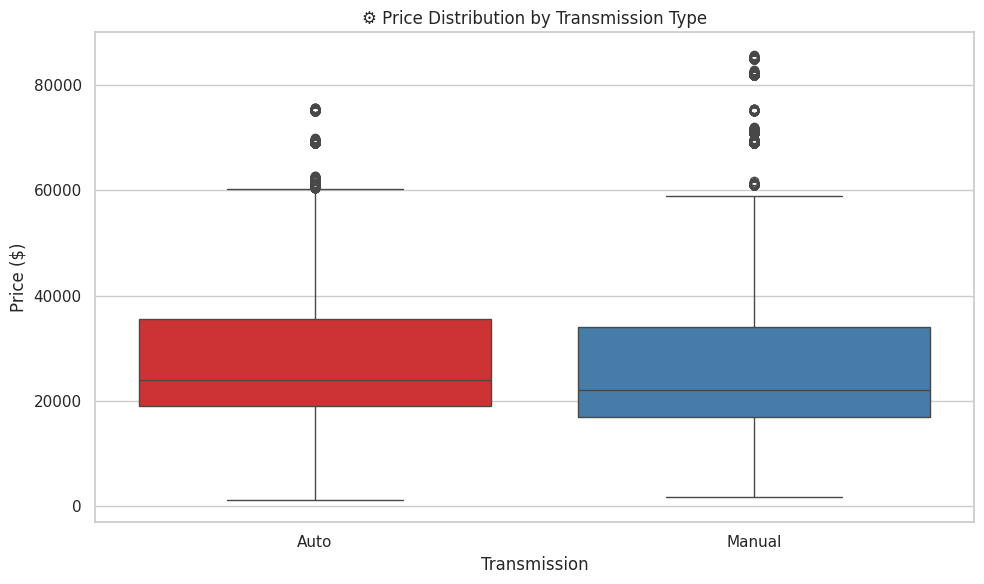

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Top 10 Car Companies by Total Sales Value
top_companies = df.groupby("Company")["Price ($)"].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=top_companies.values, y=top_companies.index, palette="crest")
plt.title("💰 Top 10 Car Companies by Total Sales Value")
plt.xlabel("Total Sales ($)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# 2. Top 10 Most Sold Models
top_models = df["Model"].value_counts().head(10)

plt.figure()
sns.barplot(x=top_models.values, y=top_models.index, palette="viridis")
plt.title("🚗 Top 10 Most Sold Car Models")
plt.xlabel("Number of Cars Sold")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# 3. Sales by Body Style
plt.figure()
sns.countplot(data=df, y="Body Style", order=df["Body Style"].value_counts().index, palette="Set2")
plt.title("🚙 Car Sales by Body Style")
plt.xlabel("Number of Cars Sold")
plt.ylabel("Body Style")
plt.tight_layout()
plt.show()

# 4. Sales by Region
plt.figure()
sns.countplot(data=df, y="Dealer_Region", order=df["Dealer_Region"].value_counts().index, palette="coolwarm")
plt.title("🌍 Car Sales by Dealer Region")
plt.xlabel("Number of Cars Sold")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# 5. Price Distribution by Transmission
plt.figure()
sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="Set1")
plt.title("⚙️ Price Distribution by Transmission Type")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


<ipython-input-15-3e4014619616>:21: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


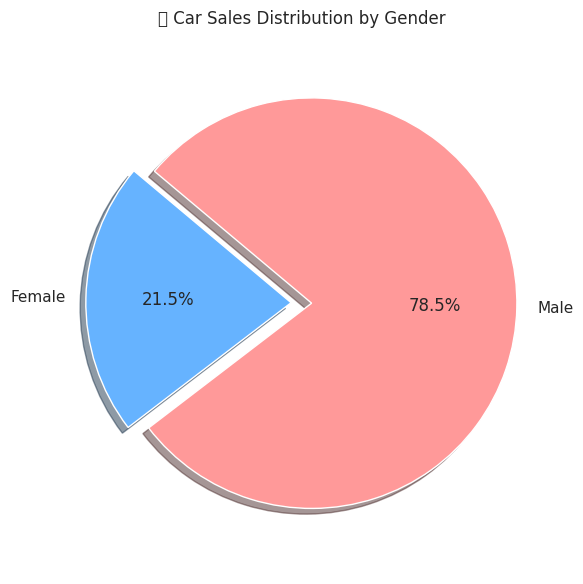

In [15]:
import matplotlib.pyplot as plt

# Group by Gender and sum sales
gender_sales = df.groupby("Gender")["Price ($)"].sum()

# Pie chart
plt.figure(figsize=(6, 6))
colors = ["#66b3ff", "#ff9999", "#99ff99", "#ffcc99"]
explode = [0.05] * len(gender_sales)  # slightly "explode" each slice

plt.pie(gender_sales,
        labels=gender_sales.index,
        autopct="%1.1f%%",
        startangle=140,
        explode=explode,
        colors=colors,
        shadow=True)

plt.title("🧍 Car Sales Distribution by Gender")
plt.axis("equal")  # Equal aspect ratio ensures a perfect circle
plt.tight_layout()
plt.show()


<ipython-input-16-d75ed342377c>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


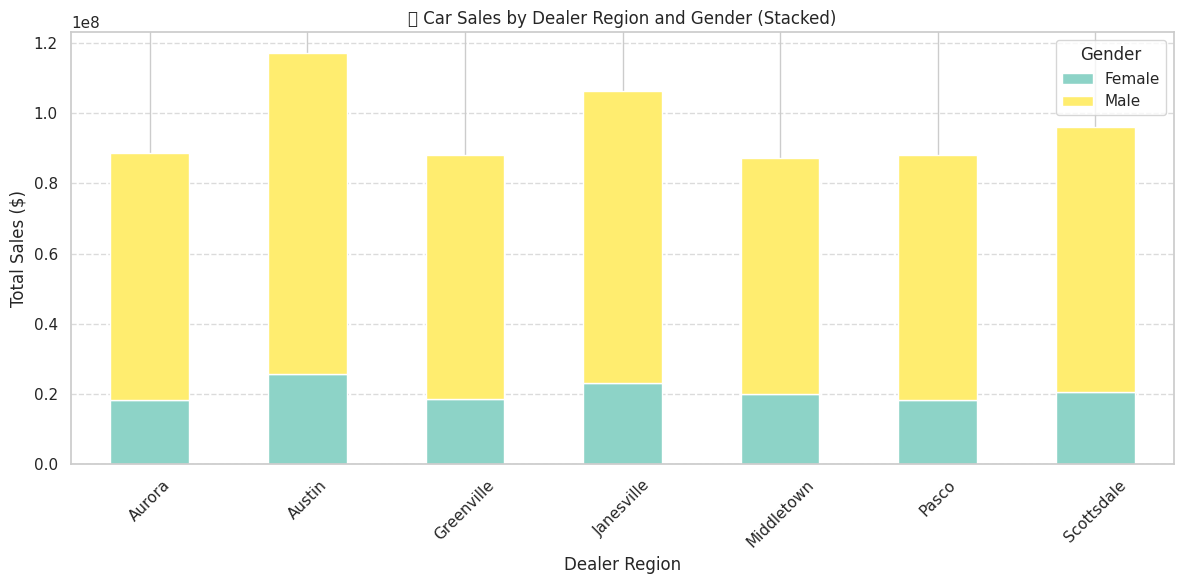

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data: Total sales by Dealer_Region and Gender
region_gender_sales = df.groupby(["Dealer_Region", "Gender"])["Price ($)"].sum().unstack().fillna(0)

# Plot
region_gender_sales.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 6))

plt.title("📊 Car Sales by Dealer Region and Gender (Stacked)")
plt.xlabel("Dealer Region")
plt.ylabel("Total Sales ($)")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<ipython-input-19-d37dd858a2af>:17: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


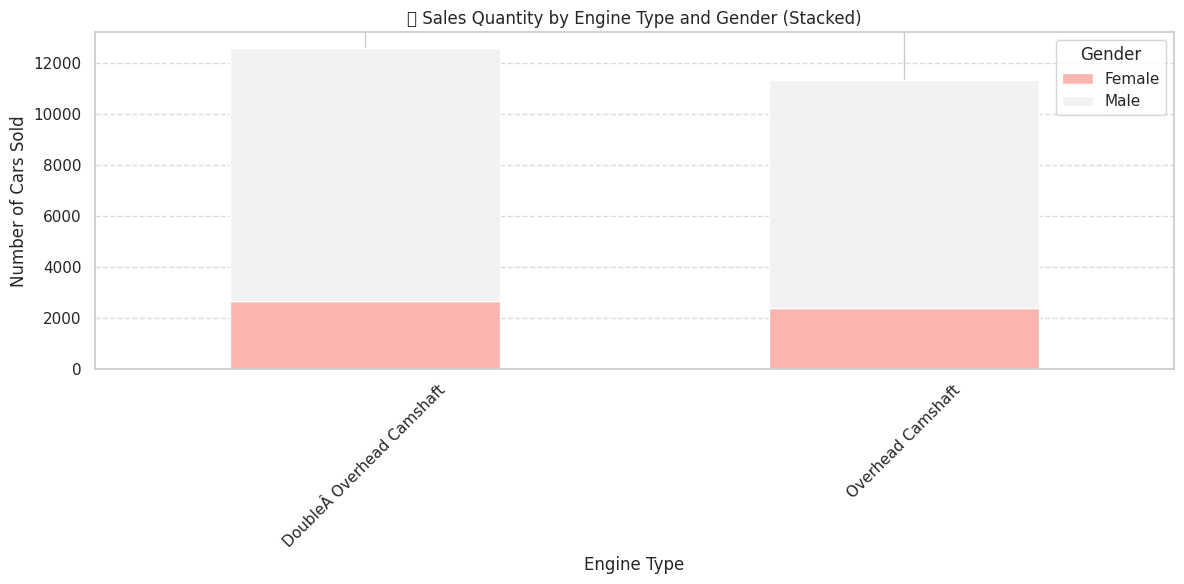

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Count of sales by Engine and Gender
engine_gender_counts = df.groupby(["Engine", "Gender"]).size().unstack().fillna(0)

# Step 2: Plot stacked bar chart
engine_gender_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Pastel1")

# Step 3: Chart aesthetics
plt.title("🛠️ Sales Quantity by Engine Type and Gender (Stacked)")
plt.xlabel("Engine Type")
plt.ylabel("Number of Cars Sold")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
